In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_excel("titanic.xlsx")
titanic.head()
titanic.shape

(1309, 12)

In [3]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


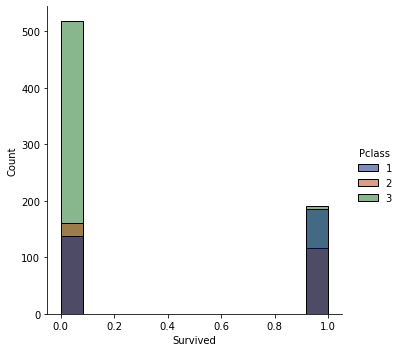

In [4]:
sns.displot(data=titanic,x="Survived",hue="Pclass",palette="dark")

<AxesSubplot:>

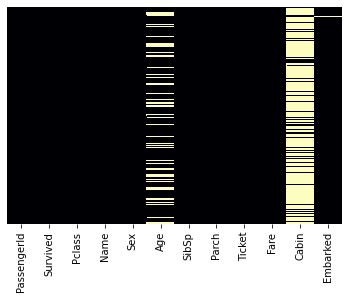

In [5]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='magma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

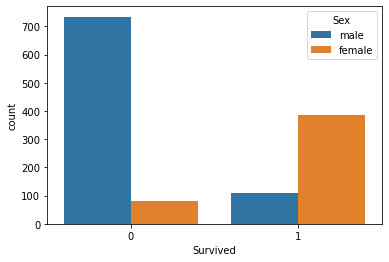

In [6]:
sns.countplot(x="Survived",hue="Sex",data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

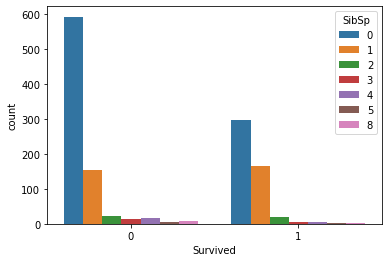

In [7]:
sns.countplot(x="Survived",hue="SibSp",data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

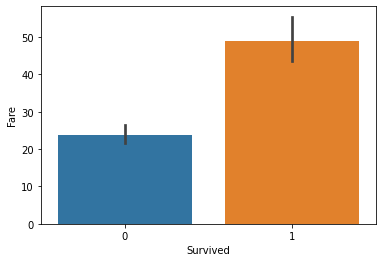

In [8]:
sns.barplot(data=titanic,x="Survived",y="Fare")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

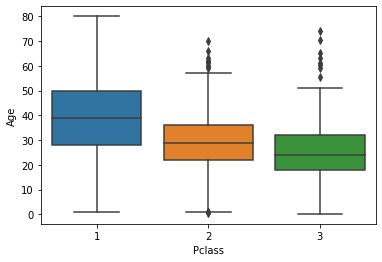

In [9]:
sns.boxplot(data=titanic,x="Pclass",y="Age")

In [10]:
def agefac(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 24
    else:
        return Age

In [11]:
titanic["Age"]=titanic[["Age","Pclass"]].apply(agefac,axis=1)
titanic.shape

(1309, 12)

<AxesSubplot:>

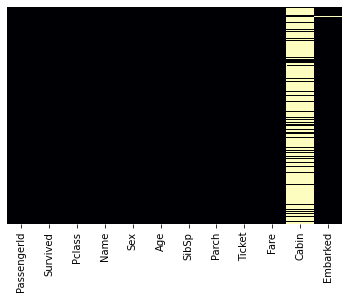

In [12]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [13]:
titanic=titanic.drop(["Cabin","Name","Ticket"],axis=1)

In [14]:
titanic.dropna(inplace=True)
titanic.shape

(1306, 9)

<AxesSubplot:>

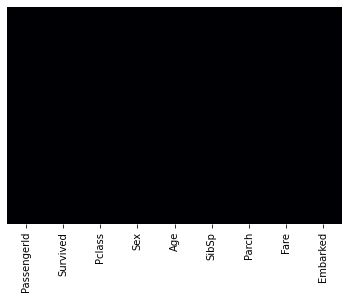

In [15]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [16]:
titanic.shape

(1306, 9)

In [17]:
Sex=pd.get_dummies(titanic["Sex"],drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
1304,1
1305,0
1306,1
1307,1


In [18]:
Embarked=pd.get_dummies(titanic["Embarked"],drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [19]:
titanic=titanic.drop(["Sex","Embarked"],axis=1)

In [20]:
titanic=pd.concat([titanic,Sex,Embarked],axis=1)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
x=titanic.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=titanic.iloc[:,[1]]

In [24]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
1304,1305,3,24.0,0,0,8.0500,1,0,1
1305,1306,1,39.0,0,0,108.9000,0,0,0
1306,1307,3,38.5,0,0,7.2500,1,0,1
1307,1308,3,24.0,0,0,8.0500,1,0,1


In [25]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,1
1306,0
1307,0


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=90)

In [60]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
148,149,2,36.50,0,2,26.0000,1,0,1
525,526,3,40.50,0,0,7.7500,1,1,0
755,756,2,0.67,1,1,14.5000,1,0,1
71,72,3,16.00,5,2,46.9000,0,0,1
1212,1213,3,25.00,0,0,7.2292,1,0,0
...,...,...,...,...,...,...,...,...,...
571,572,1,53.00,2,0,51.4792,0,0,1
453,454,1,49.00,1,0,89.1042,1,0,0
680,681,3,24.00,0,0,8.1375,0,1,0
672,673,2,70.00,0,0,10.5000,1,0,1


In [61]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1296,1297,2,20.0,0,0,13.8625,1,0,0
251,252,3,29.0,1,1,10.4625,0,0,1
869,870,3,4.0,1,1,11.1333,1,0,1
468,469,3,24.0,0,0,7.7250,1,1,0
529,530,2,23.0,2,1,11.5000,1,0,1
...,...,...,...,...,...,...,...,...,...
460,461,1,48.0,0,0,26.5500,1,0,1
1011,1012,2,12.0,0,0,15.7500,0,0,1
132,133,3,47.0,1,0,14.5000,0,0,1
1240,1241,2,31.0,0,0,21.0000,0,0,1


In [62]:
y_train

,Survived
148,0
525,0
755,1
71,0
1212,0
...,...
571,1
453,1
680,0
672,0


In [63]:
y_test

,Survived
1296,0
251,0
869,1
468,0
529,0
...,...
460,1
1011,1
132,0
1240,1


In [64]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [65]:
print(classifier.predict([[12,2,43.0,0,1,34.5674,0,1,0]]))

[1]


In [66]:
y_pred=classifier.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8489483747609943

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       317
           1       0.83      0.78      0.80       206

    accuracy                           0.85       523
   macro avg       0.84      0.84      0.84       523
weighted avg       0.85      0.85      0.85       523

